# Procesamiento de datos con Python y Pandas Primera parte


## Que es Pandas 

* Pandas es una biblioteca para realizar análisis de datos.
* Es un componente fundamental de la ciencia de datos de Python.
* Desarrollado por [Wes McKinney](http://wesmckinney.com/pages/about.html) mientras trabajaba en la industria financiera.
* Vanilla Python (lo que hicimos anteriormente) puede hacer muchas de las mismas cosas, pero Pandas las hace *más rápido* y generalmente en menos líneas de código.
* Para hacer esto, se construye sobre otra biblioteca de terceros llamada [numpy](http://www.numpy.org/)
    * Si tienes TONELADAS de datos numéricos, puedes usar Numpy directamente
* Pandas le da a Python algunas funciones similares a las de R (Dataframes)
    * R es un entorno y lenguaje de programación con un enfoque al análisis estadístico.

## Porque Pandas?

* Pandas proporciona un poderoso conjunto de estructuras de datos y funciones para trabajar con datos.
* Una vez que aprenda estas estructuras y funciones (lo que lleva tiempo), podrá comenzar a hacer preguntas rápidamente y obtener respuestas a partir de los datos.
* Pandas se integra muy bien con otras bibliotecas en el ecosistema de ciencia de datos de Python como:
    * [Jupyter Notebooks](http://jupyter.org/): Nuestro pan de cada dia como Data scientist
    * [Matplotlib](https://matplotlib.org/) - Visualizar Datos
    * [Scikit Learn](http://scikit-learn.org/stable/): se integra con la API (Application Programming Interface) de Machine Learning



In [37]:
import pandas as pd
import numpy as np


In [38]:
a = 0.0000000000000000001
print(a)

1e-19


In [34]:

# Cargar archivoi CSV
datos = pd.read_csv("community-center-attendance.csv", index_col="fecha", parse_dates=True)

# Eliminar una columna especifica
datos = datos.drop(columns="_ID")

# Mirar las primeras 10 filas del archivo
datos.head(10)

,Nombre_Centro,Contador_Asistieron
fecha,,
2018-06-08,Ormsby Community Center,10
2018-06-08,Paulson Community Center,19
2018-06-08,Phillips Community Center,107
2018-06-08,Ammon Community Center,81
2018-06-08,Brookline Community Center,33
2018-06-08,Jefferson Community Center,29
2018-06-08,Warrington Community Center,15
2018-06-08,West Penn Community Center,54
2018-06-07,Phillips Community Center,77


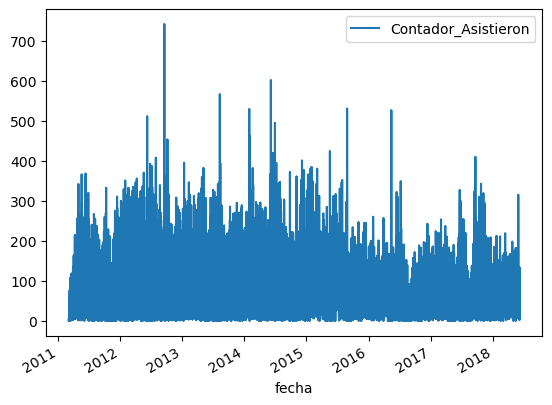

In [13]:
# Como se ven los datos graficamente?
datos.plot();

We can pivot the data so the center names are columns and each row is the number of people attending that community center per day. This is basically rotating the data.

In [36]:
# Usar la funcion pivot para hacer valores de las columas, columnas
datos.pivot(columns="Nombre_Centro", values="Contador_Asistieron").head()

Nombre_Centro,Ammon / Josh Gibson Field,Ammon Community Center,Ammon Pool,Arlington Community Center,Arlington Field (Playground),Brookline Community Center,Dan Marino Field (Playground),Frick Environmental Center,Gladstone Field,Highland Pool,...,Paulson Community Center,Paulson Field,Phillips Community Center,Phillips Park Field,Schenley Ice Rink,Warrington Community Center,Warrington Field,West Penn Community Center,West Penn Fields,West Penn Pool
fecha,,,,,,,,,,,,,,,,,,,,,
2011-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
2011-03-08,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2011-03-09,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-10,NaN,1.0,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,...,NaN,NaN,32.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN
2011-03-11,NaN,19.0,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,...,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Muchos NaN.
Es posible que queramos dividir esto para cada centro comunitario. Podemos comenzar inspeccionando las filas numéricas por centro.

In [21]:
# contar el número de filas por centro y ordenar la lista
datos.groupby("Nombre_Centro").count().sort_values(by=["Contador_Asistieron"], 
                                                ascending=True)

#Parece un codigo muy largo y complicado, expliquemos paso a paso

,Contador_Asistieron
Nombre_Centro,
Ammon / Josh Gibson Field,1
Warrington Field,1
Schenley Ice Rink,1
Arlington Field (Playground),1
Dan Marino Field (Playground),1
Frick Environmental Center,1
Highland Pool,1
Moore Pool,1
West Penn Fields,1


We can look at this visually too!

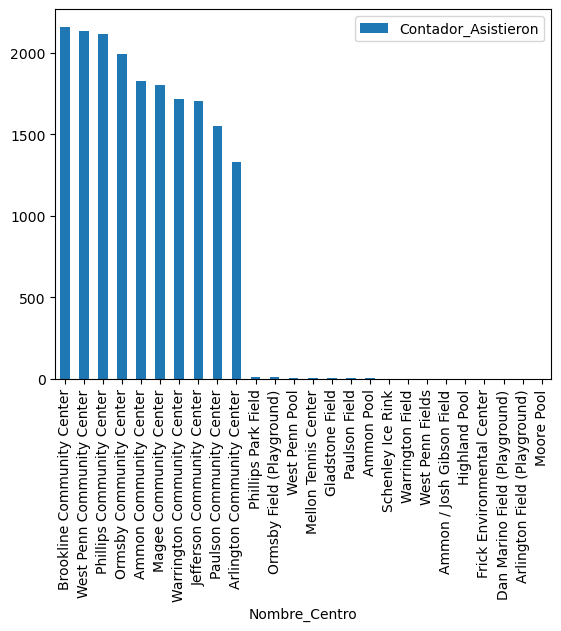

In [25]:
# Grafica del total de personas que asistieron
datos.groupby("Nombre_Centro").count().sort_values(by=["Contador_Asistieron"], 
                                                ascending=False).plot(kind='bar');

Hay muchos centros comunitarios que no tienen muchos números porque 1) no son muy populares o 2) no informan su asistencia diaria (lo más probable, dado el número de NaN que vimos arriba).

Lo que haremos es crear una función de filtro personalizada que aplicaremos a cada fila del marco de datos usando la [función de filtro groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.filter.html). Estas son algunas cosas raras que estamos haciendo aquí. Esta no es la antigua función de filtro, es una función de filtro especial (parte de la funcionalidad groupby) que requiere que usted cree una función especial para aplicar a cada fila. En nuestro caso, crearemos una pequeña función que toma un valor y prueba para ver si es superior a un valor umbral (en nuestro caso, 1000).

<Axes: xlabel='Nombre_Centro'>

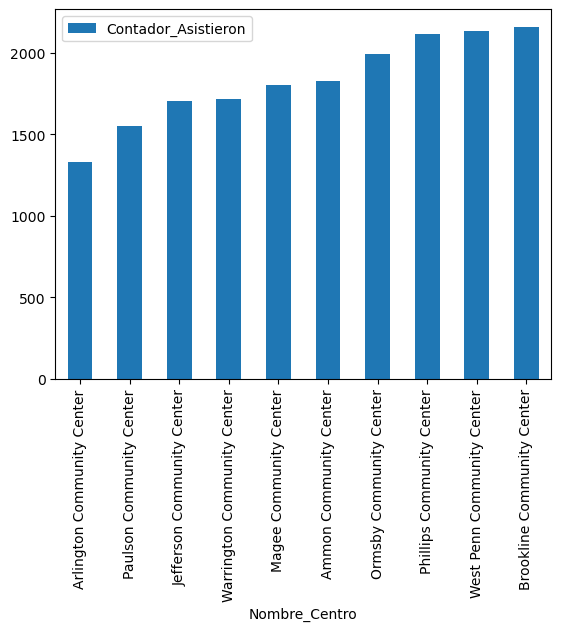

In [30]:
# crear una función que usaremos para realizar una operación de filtrado de los datos
# filtrar centros que tienen menos de 1000 entradas en total
def eliminar_menores(x, limite):
    if len(x) > limite:
        return True
    else:
        return False

# usar la función personalizada para filtrar filas
centro_popular = datos.groupby("Nombre_Centro").filter(eliminar_menores, 
                                                     limite=1000)

# mira qué centros hay en los datos ahora
centro_popular.groupby("Nombre_Centro").count().sort_values(by=["Contador_Asistieron"], 
                                                ascending=True).plot(kind = 'bar')

Ahora tenemos un subconjunto de datos más sustancioso para examinar.

In [56]:
# mira las primeras 5 filas
centro_popular.head()

,Nombre_Centro,Contador_Asistieron
fecha,,
2018-06-08,Ormsby Community Center,10
2018-06-08,Paulson Community Center,19
2018-06-08,Phillips Community Center,107
2018-06-08,Ammon Community Center,81
2018-06-08,Brookline Community Center,33


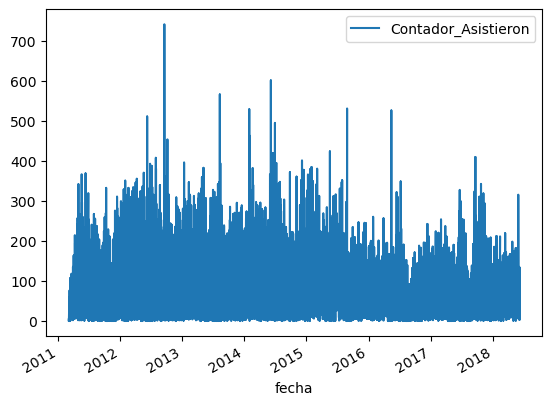

In [61]:
# trazar los centros comunitarios populares
centro_popular.plot();

In [35]:
import pandas as pd